# Forest Fire Detection : Using CNN.....

### Project Description
There is a dataset of forest images, part of which is fire. The task is to develop a machine learning convolutional neural network algorithm to detect whether the image is **Fire** or **No-Fire** on the unknown dataset.

### Data Description
The dataset consists of images, and some of them are Fire or No-Fire

Data files:
- ```train and validation ``` - a folder for training
- ```test``` - a folder with images, for which we make Detection.

### Project Methodology

 - Recommended Approach is building CNN neural Network . we try with different neural network with different layering and with different optimizer's. In this project we try to build at least three CNN model..

#### Final project output: *** Image with label 1) Fire or 2) No-Fire ***

### Data
Dataset can be found [here](www.kaggle.com).


### Project Team:
    - Mayank Mangal Mourya (202051116)
    - Vikas Bisnoi (202052345)
    - Vishal Kumar sahu (202052347)
    - Hardik Garbyal (202051079)


## Import Important Librarie's

In [ ]:
import os
import pathlib
import glob
import PIL
import cv2
import seaborn
import numpy as np
from PIL import Image
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
%matplotlib inline

In [ ]:
# resize all image as a part of data pre-processing.
train = ImageDataGenerator(rescale=1/255, 
                           rotation_range=20, 
                           width_shift_range=0.1, 
                           height_shift_range=0.1, 
                           shear_range=0.1,
                           zoom_range=0.1, 
                           horizontal_flip=True, 
                           fill_mode='nearest'
                          )  
test = ImageDataGenerator(rescale=1/255, 
                          rotation_range=20, 
                          width_shift_range=0.1, 
                          height_shift_range=0.1, 
                          shear_range=0.1,
                          zoom_range=0.1, 
                          horizontal_flip=True, 
                          fill_mode='nearest'
                         )

In [ ]:
#flow_from_directory generally "Takes the path to a directory, and generates batches of augmented/normalized data"
train_dataset = train.flow_from_directory(
    "/home/windows/Desktop/Zummit_infolabs-forest-fire-detection-/forest_fire/Training and Validation",
    target_size=(150,150), 
    batch_size = 32, 
    class_mode = 'binary'
)

Found 1832 images belonging to 2 classes.


In [ ]:
test_dataset = test.flow_from_directory(
    "/home/windows/Desktop/Zummit_infolabs-forest-fire-detection-/forest_fire/Testing",
    target_size=(150,150), 
    batch_size =32, 
    class_mode = 'binary'
)

Found 68 images belonging to 2 classes.


In [ ]:
print(test_dataset.class_indices)
print(train_dataset.class_indices)

{'fire': 0, 'nofire': 1}
{'fire': 0, 'nofire': 1}


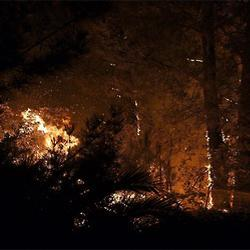

In [ ]:
img = Image.open('/home/windows/Desktop/Zummit_infolabs-forest-fire-detection-/forest_fire/Training and Validation/fire/abc001.jpg')
img

### **Convolution filters** : These are filters (multi-dimensional data) used in Convolution layer which helps in extracting specific features from input data.
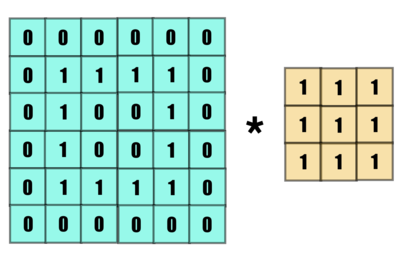
### A **kernel** is, as described earlier, a matrix of weights which are multiplied with the input to extract relevant features.

### Activation : It’s just a thing function that you use to get the output of node. It is also known as Transfer Function. It is used to determine the output of neural network like yes or no. It maps the resulting values in between 0 to 1 or -1 to 1 etc. (depending upon the function).

## Creating and training different CNNs

In the CNN structure we add **Dropout() regularization and BatchNormalization()** layers.

### Batch normalization : it is a process to make neural networks faster and more stable through adding extra layers in a deep neural network.

- **BatchNormalization()** normalizes the activations of the previous layer at each batch, by subtracting the batch mean and dividing by the batch standard deviation. This helps to **stabilize the learning process and allow higher learning rates**, as well as reducing the chances of the model getting stuck in the saddle points or local optima.

- **Dropout()** is a regularization technique where some neurons are randomly dropped out during training. This helps to **reduce overfitting by preventing complex co-adaptations on training data**. The dropout rate is the fraction of neurons that are dropped out, usually between 0.2 and 0.5. At test time, no neurons are dropped out, but the weights are scaled by the dropout rate to balance the effect of missing neurons.

### Dropout can be used after any non-output layer. To investigate the impact of dropout, train an image classification model. I'll start with an unregularized network and then use Dropout to train a regularised network.

In [ ]:
def Build_CNN_model_1(input_shape):
    model = keras.Sequential()

    model.add(keras.layers.Conv2D(filters = 32, kernel_size=(2, 2), activation ='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.BatchNormalization()) # added
    model.add(keras.layers.Conv2D(filters = 64, kernel_size = (2,2), activation ='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
    
    # Normalize activation of previous layer at each batch so that cnn stabilize the learning process and allow 
   # higher rate.
    model.add(keras.layers.BatchNormalization()) # added
    
   # convert matrix into single vector
    model.add(keras.layers.Flatten())
    
   # here me were classify
    model.add(keras.layers.Dense(64, activation='relu'))
   # Normalize activation of previous layer at each batch so that cnn stabilize the learning process and allow 
   # higher rate.
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=0.0001) # updated to lr=0.0001

    model.compile(loss = "binary_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
def Build_CNN_model_2(input_shape):
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), padding='same', input_shape=input_shape))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3)))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(keras.layers.Dropout(0.25)) # regularization
    
    # Normalize activation of previous layer at each batch so that cnn stabilize the learning process and allow 
   # higher rate.
    model.add(keras.layers.BatchNormalization()) # added
#     model.add(Conv2D(64, (3, 3), padding='same'))
#     model.add(Activation('relu'))
    model.add(keras.layers.Conv2D(64, (3, 3)))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    # Reduce the overfitting  by droping the neuron randomly.
    model.add(keras.layers.Dropout(0.25)) # regularization
    
    model.add(keras.layers.BatchNormalization()) # added
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='Adamax', loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [ ]:
def Build_CNN_model_3(input_shape):
    model = keras.Sequential()

    model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

    model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

    model.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

    model.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation='relu'))
    model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

    model.add(keras.layers.Flatten())

    # We are taking here activation relu (directly give positive or zero.)
    # here we taken dense layer with 512 neurons and classify output using 'relu' activation func
    model.add(keras.layers.Dense(512, activation='relu'))   
    # here we taken dense layer with 512 neurons and classify output using 'relu' activation func
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
input_shape = (150,150,3)

In [ ]:
model1 = Build_CNN_model_1(input_shape)
CNN_Model_1 = model1.fit(train_dataset, epochs = 50, validation_data = test_dataset)

Epoch 1/50


2023-04-06 01:22:12.951295: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


58/58 [==============================] - ETA: 0s - loss: 0.2128 - accuracy: 0.9203

2023-04-06 01:22:25.727984: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


58/58 [==============================] - 13s 204ms/step - loss: 0.2128 - accuracy: 0.9203 - val_loss: 0.8084 - val_accuracy: 0.3235
Epoch 2/50
58/58 [==============================] - 12s 198ms/step - loss: 0.1318 - accuracy: 0.9531 - val_loss: 0.8922 - val_accuracy: 0.3235
Epoch 3/50
58/58 [==============================] - 12s 206ms/step - loss: 0.1331 - accuracy: 0.9487 - val_loss: 0.6730 - val_accuracy: 0.4853
Epoch 4/50
58/58 [==============================] - 12s 215ms/step - loss: 0.1306 - accuracy: 0.9520 - val_loss: 0.7075 - val_accuracy: 0.5147
Epoch 5/50
58/58 [==============================] - 12s 209ms/step - loss: 0.1004 - accuracy: 0.9667 - val_loss: 0.4541 - val_accuracy: 0.9118
Epoch 6/50
58/58 [==============================] - 12s 205ms/step - loss: 0.0972 - accuracy: 0.9645 - val_loss: 0.4150 - val_accuracy: 0.8676
Epoch 7/50
58/58 [==============================] - 12s 204ms/step - loss: 0.1004 - accuracy: 0.9612 - val_loss: 0.2489 - val_accuracy: 0.8824
Epoch 8/50

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 149, 149, 32)      416       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 74, 74, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 73, 73, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                      

In [ ]:
model2 = Build_CNN_model_2(input_shape)
CNN_Model_2 = model2.fit(train_dataset, epochs = 50, validation_data = test_dataset)

Epoch 1/50


2023-04-06 01:43:39.691705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


58/58 [==============================] - ETA: 0s - loss: 0.3406 - accuracy: 0.9121

2023-04-06 01:43:59.959826: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


58/58 [==============================] - 21s 338ms/step - loss: 0.3406 - accuracy: 0.9121 - val_loss: 4.3376 - val_accuracy: 0.3235
Epoch 2/50
58/58 [==============================] - 21s 352ms/step - loss: 0.2197 - accuracy: 0.9334 - val_loss: 7.6840 - val_accuracy: 0.3235
Epoch 3/50
58/58 [==============================] - 21s 355ms/step - loss: 0.2259 - accuracy: 0.9356 - val_loss: 11.0056 - val_accuracy: 0.3235
Epoch 4/50
58/58 [==============================] - 21s 357ms/step - loss: 0.1824 - accuracy: 0.9432 - val_loss: 11.1470 - val_accuracy: 0.3235
Epoch 5/50
58/58 [==============================] - 21s 355ms/step - loss: 0.2092 - accuracy: 0.9378 - val_loss: 11.3335 - val_accuracy: 0.3235
Epoch 6/50
58/58 [==============================] - 21s 355ms/step - loss: 0.1984 - accuracy: 0.9350 - val_loss: 8.5002 - val_accuracy: 0.3235
Epoch 7/50
58/58 [==============================] - 20s 341ms/step - loss: 0.2123 - accuracy: 0.9372 - val_loss: 8.1962 - val_accuracy: 0.3235
Epoch 8

In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 activation_6 (Activation)   (None, 150, 150, 32)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 148, 148, 32)      9248      
                                                                 
 activation_7 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 74, 74, 32)        0         
                                                      

In [ ]:
model3 = Build_CNN_model_3(input_shape)
CNN_Model_3 = model3.fit(train_dataset, epochs = 50, validation_data = test_dataset)

Epoch 1/50


2023-04-06 02:06:45.368068: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


58/58 [==============================] - ETA: 0s - loss: 0.2740 - accuracy: 0.8897

2023-04-06 02:07:01.880322: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


58/58 [==============================] - 17s 274ms/step - loss: 0.2740 - accuracy: 0.8897 - val_loss: 0.4430 - val_accuracy: 0.7941
Epoch 2/50
58/58 [==============================] - 16s 273ms/step - loss: 0.1617 - accuracy: 0.9487 - val_loss: 0.1970 - val_accuracy: 0.9412
Epoch 3/50
58/58 [==============================] - 15s 260ms/step - loss: 0.1575 - accuracy: 0.9438 - val_loss: 0.4254 - val_accuracy: 0.8676
Epoch 4/50
58/58 [==============================] - 15s 262ms/step - loss: 0.1229 - accuracy: 0.9623 - val_loss: 0.2832 - val_accuracy: 0.8824
Epoch 5/50
58/58 [==============================] - 16s 269ms/step - loss: 0.1352 - accuracy: 0.9580 - val_loss: 0.2912 - val_accuracy: 0.9118
Epoch 6/50
58/58 [==============================] - 16s 270ms/step - loss: 0.0858 - accuracy: 0.9727 - val_loss: 0.1789 - val_accuracy: 0.9265
Epoch 7/50
58/58 [==============================] - 18s 303ms/step - loss: 0.0994 - accuracy: 0.9662 - val_loss: 0.2684 - val_accuracy: 0.9265
Epoch 8/50

In [ ]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [55]:
from tensorflow.keras.utils import plot_model

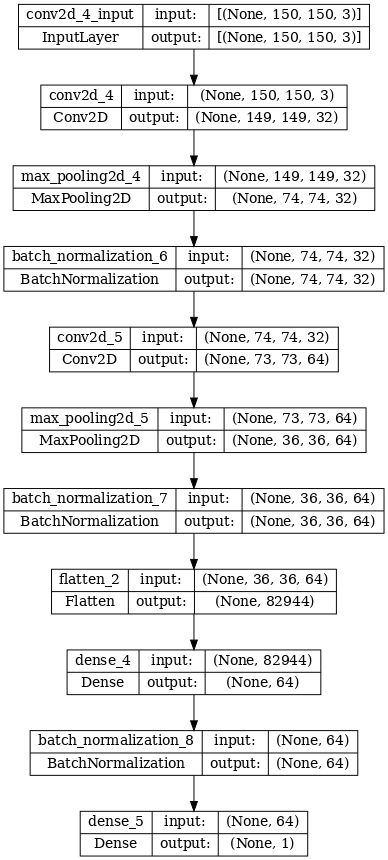

In [56]:
plot_model(model1, 
           show_shapes = True,
           show_dtype=False,
           show_layer_names = True, 
           rankdir = 'TB', 
           expand_nested = False, 
           dpi = 70)

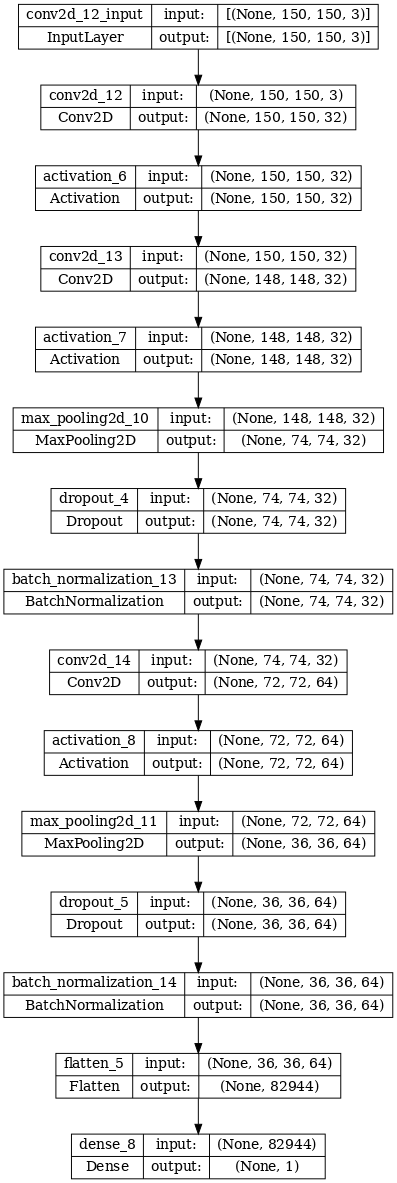

In [57]:
plot_model(model2, 
           show_shapes = True,
           show_dtype=False,
           show_layer_names = True, 
           rankdir = 'TB', 
           expand_nested = False, 
           dpi = 70)

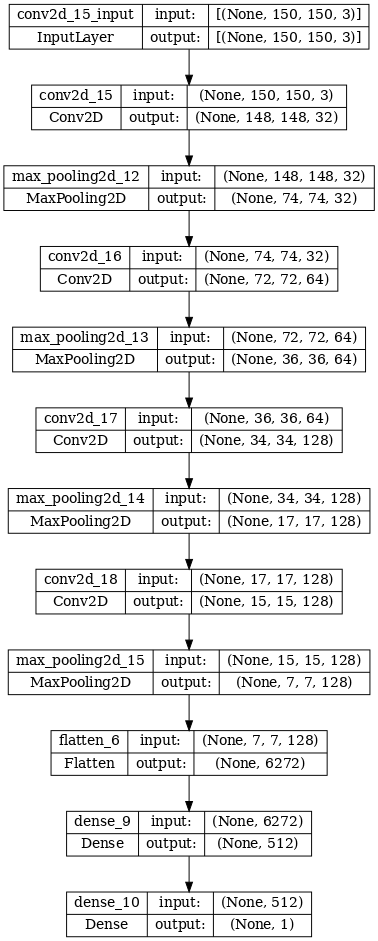

In [58]:
plot_model(model3, 
           show_shapes = True,
           show_dtype=False,
           show_layer_names = True, 
           rankdir = 'TB', 
           expand_nested = False, 
           dpi = 70)

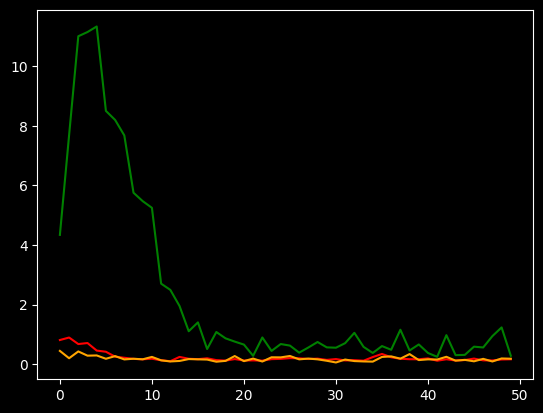

In [60]:
plt.style.use('dark_background')
plt.plot(CNN_Model_1.history['val_loss'], 'r', 
         CNN_Model_2.history['val_loss'], 'g', 
         CNN_Model_3.history['val_loss'], 'orange');

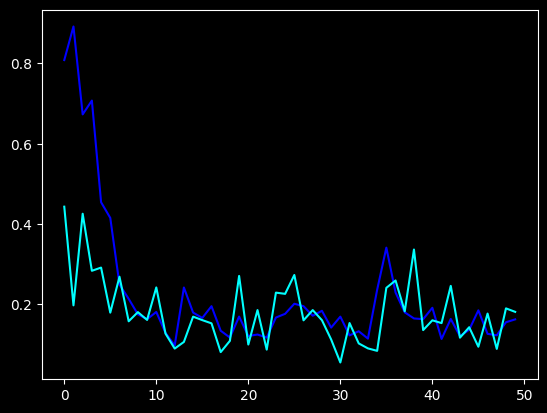

In [62]:
plt.plot(CNN_Model_1.history['val_loss'], 'b',
         CNN_Model_3.history['val_loss'], 'cyan');

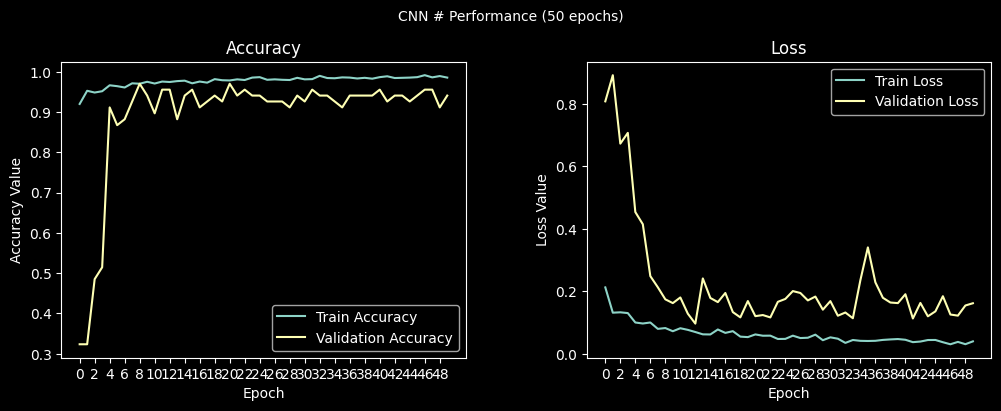

In [64]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN # Performance (50 epochs)', fontsize=10)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0, 50))
ax1.plot(epoch_list, CNN_Model_1.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, CNN_Model_1.history['val_accuracy'], label='Validation Accuracy')

ax1.set_xticks(np.arange(0, 50, 2))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, CNN_Model_1.history['loss'], label='Train Loss')
ax2.plot(epoch_list, CNN_Model_1.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 50, 2))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

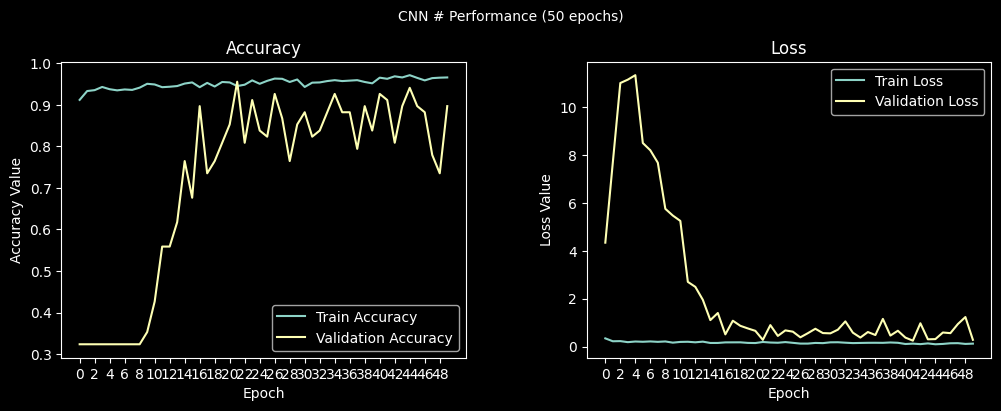

In [65]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN # Performance (50 epochs)', fontsize=10)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0, 50))
ax1.plot(epoch_list, CNN_Model_2.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, CNN_Model_2.history['val_accuracy'], label='Validation Accuracy')

ax1.set_xticks(np.arange(0, 50, 2))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, CNN_Model_2.history['loss'], label='Train Loss')
ax2.plot(epoch_list, CNN_Model_2.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 50, 2))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

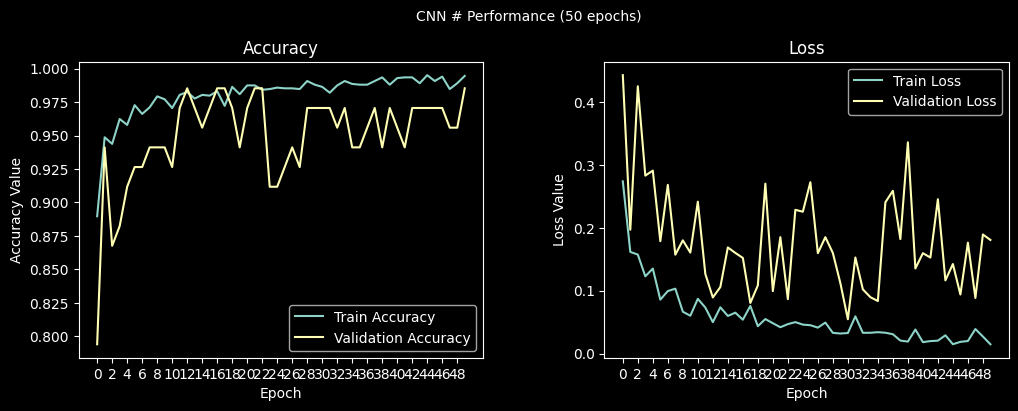

In [66]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN # Performance (50 epochs)', fontsize=10)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0, 50))
ax1.plot(epoch_list, CNN_Model_3.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, CNN_Model_3.history['val_accuracy'], label='Validation Accuracy')

ax1.set_xticks(np.arange(0, 50, 2))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, CNN_Model_3.history['loss'], label='Train Loss')
ax2.plot(epoch_list, CNN_Model_3.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 50, 2))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [68]:
# Evaluate the loss and accuracy
loss, accuracy = model1.evaluate(test_dataset)

# Print the accuracy
print("Model 1 Accuracy: " + str(accuracy))
# Print the loss
print("Model 1 Loss: " + str(loss))
# Evaluate the loss and accuracy
loss, accuracy = model2.evaluate(test_dataset)

# Print the accuracy
print("Model 2 Accuracy: " + str(accuracy))
# Print the loss
print("Model 2 Loss: " + str(loss))
# Evaluate the loss and accuracy
loss, accuracy = model3.evaluate(test_dataset)

# Print the accuracy
print("Model 3 Accuracy: " + str(accuracy))
# Print the loss
print("Model 3 Loss: " + str(loss))


1/3 [=========>....................] - ETA: 0s - loss: 0.1452 - accuracy: 0.9688

2023-04-06 11:06:28.241714: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3/3 [==============================] - 0s 72ms/step - loss: 0.1464 - accuracy: 0.9559
Model 1 Accuracy: 0.9558823704719543
Model 1 Loss: 0.14643754065036774


2023-04-06 11:06:28.685234: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3/3 [==============================] - 0s 104ms/step - loss: 0.3064 - accuracy: 0.9265
Model 2 Accuracy: 0.9264705777168274
Model 2 Loss: 0.30642274022102356


2023-04-06 11:06:29.292944: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3/3 [==============================] - 0s 84ms/step - loss: 0.2842 - accuracy: 0.9559
Model 3 Accuracy: 0.9558823704719543
Model 3 Loss: 0.2842448353767395


# Conclusion :
  - Model 1 Accuracy: 0.9558823704719543
  - Model 2 Accuracy: 0.9264705777168274
  - Model 3 Accuracy: 0.9558823704719543
### We get Model 1 and Model 3 wiht highest accuracy Now we our model buliding  part is completed and we start with our prediction of test case part

In [70]:
prediction1 = model1.predict(test_dataset)
print('Length :', len(prediction1))
prediction2 = model3.predict(test_dataset)
print('Length :', len(prediction2))


1/3 [=========>....................] - ETA: 0s

2023-04-06 11:09:52.847211: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3/3 [==============================] - 0s 106ms/step
Length : 68


2023-04-06 11:09:53.366598: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3/3 [==============================] - 1s 93ms/step
Length : 68


In [76]:
model1.save("model1.h5")

In [77]:
model2.save("model2.h5")

# Conclusion :
### We Successfully build different CNN model with high accuracy of 95 % and saved model1.h5 and model2.h5 Now we go to our load_prediction Part 